# Exploratory Data Analysis on Customer Actions and Purchase Behavior


## Overview
This notebook performs an exploratory data analysis (EDA) on a dataset of customer actions. The focus is on understanding customer behavior, identifying trends, and drawing insights that can help improve decision-making processes related to product engagement and sales.

### Key Objectives:
- Analyze the popularity of product categories and subcategories.
- Examine user actions (such as views, purchases, and reviews) to identify trends.
- Investigate seasonal trends, promotions, and spikes in customer activities.

## Dataset Information
The dataset contains records of various customer actions, including:
- **Product Views**: How often products are viewed.
- **Purchases**: Number of items bought over time.
- **Reviews**: User reviews for products.
- **Wishlists**: Products added to wishlists.

### Key Variables:
1. **Date**: The time when the customer action occurred.
2. **Category & Subcategory**: The type of products being engaged with.
3. **Action**: The customer action (purchase, view, etc.).
4. **Rate**: Rating given by customers.
5. **Total Price**: The total amount spent by customers.


## Contents

I. [Loading the Data:](#Loading-the-Data:)

II. [Univariate Analysis:](#Univariate-Analysis:)


*  [Time range of Data:](#Time-range-of-Data:)

* [Distribution of Category:](#Distribution-of-Category:)

* [Distribution of SubCategory:](#Distribution-of-SubCategory:)

* [Distribution of Action:](#Distribution-of-Action:)

* [Distribution of Quantity:](#Distribution-of-Quantity:)

* [Distribution of Rate:](#Distribution-of-Rate:)

* [Distribution of Total Price:](#Distribution-of-Total-Price:)

    
    
III. [Multivariate Analysis:](#Multivariate-Analysis:)

* [How many unique users in the data and how many of them purchased atleast once? Also, what is the average number of purchase per customer?](#How-many-unique-users-in-the-data-and-how-many-of-them-purchased-atleast-once?-Also,-what-is-the-average-number-of-purchase-per-customer?)

* [Which is the most purchased Category/Sub-category?](#Which-is-the-most-purchased-Category/Sub-category?)

* [Do people add the products to cart before they purchase or buy directly?](#Do-people-add-the-products-to-cart-before-they-purchase-or-buy-directly?)

* [What is the average time taken by a user to buy a product?](#What-is-the-average-time-taken-by-a-user-to-buy-a-product?)

* [What is the average time between repeat purchase?](#What-is-the-average-time-between-repeat-purchase?)

* [What is the trend of unique users across time period?](#What-is-the-trend-of-unique-users-across-time-period?)

* [What is the trend of purchase across the time period?](#What-is-the-trend-of-purchase-across-the-time-period?)

## Loading the Data:

([Contents:](#Contents:))

In [ ]:
# Importing the necessary Libraries
import pandas as pd
import numpy as np
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Reading the data and changing the data type of the column "DateTime" from string to datetime format
data = pd.read_excel('final_customer_data.xlsx')
data['DateTime'] = pd.to_datetime(data['DateTime'])
print(data.shape)
data.head()

(2090, 9)


,User_id,Session_id,DateTime,Category,SubCategory,Action,Quantity,Rate,Total Price
0,52243841613,d76fde-8bb3-4e00-8c23,2019-01-10 10:20:00,Electronic Appliances,Speakers,first_app_open,NaN,NaN,NaN
1,52243841613,33dfbd-b87a-4708-9857,2019-01-10 10:22:00,Electronic Appliances,Speakers,search,NaN,NaN,NaN
2,57314161118,6511c2-e2e3-422b-b695,2019-01-10 14:00:00,Men's Fashion,Jeans,search,NaN,NaN,NaN
3,57314161118,90fc70-0e80-4590-96f3,2019-01-10 14:07:00,Men's Fashion,Jeans,product_view,NaN,NaN,NaN
4,57314161118,bd7419-2748-4c56-95b4,2019-01-10 14:12:00,Men's Fashion,Jeans,read_reviews,NaN,NaN,NaN


In [ ]:
data.sample(10)

,User_id,Session_id,DateTime,Category,SubCategory,Action,Quantity,Rate,Total Price
1069,58624247783,3a73cd3b-6cb7-4879-8848,2019-05-11 18:11:00,Winter Wear,Sweatshirts,add_to_cart,NaN,NaN,NaN
1558,57507062720,add709e7-b699-4885-a537,2019-10-11 20:07:00,Artwork,Handcrafted idol,first_app_open,NaN,NaN,NaN
330,51969791374,iouklo0-5823-4ea6-ac5d-e786,2019-08-19 18:30:00,Men's Fashion,Jeans,checkout,NaN,NaN,NaN
1108,54074421036,1c5a1743-f1f3-4b23-a27b,2019-06-11 15:12:00,Smart Home Automation,Smart lights,product_view,NaN,NaN,NaN
108,52085995220,0cb218-db90-4011-b582,2019-04-10 11:07:00,Mobile & Accessories,Cases and Covers,read_reviews,NaN,NaN,NaN
454,51589427926,ccbv13-5dcx2-48c4-a4ssb-4sd,2019-04-03 11:09:00,Mobile & Accessories,Screen Guard,add_to_cart,NaN,NaN,NaN
1840,53209756433,ukjghde-40ac-42cc-78654,2019-11-11 20:03:00,Footwear,Crocs,search,NaN,NaN,NaN
1167,59713929100,c3cd928d-779a-4e27-8753,2019-07-11 10:44:00,Seasonal Appliances,Air coolers,purchase,1.0,6000.0,6000.0
797,51743891883,142aa82c-e9fa-4f04-b904,2019-02-11 13:09:00,Men's Fashion,Wallet,product_view,NaN,NaN,NaN
1425,52769802843,ythiuhja-a685-4552-86545,2019-09-11 22:40:00,Baby Care,Diapers,add_to_wishlist,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 2090 entries, 0 to 2089

Data columns (total 9 columns):

 #   Column       Non-Null Count  Dtype         

---  ------       --------------  -----         

 0   User_id      2090 non-null   int64         

 1   Session_id   2090 non-null   object        

 2   DateTime     2090 non-null   datetime64[ns]

 3   Category     2090 non-null   object        

 4   SubCategory  2090 non-null   object        

 5   Action       2090 non-null   object        

 6   Quantity     201 non-null    float64       

 7   Rate         201 non-null    float64       

 8   Total Price  201 non-null    float64       

dtypes: datetime64[ns](1), float64(3), int64(1), object(4)

memory usage: 147.1+ KB


## Univariate Analysis:

#### Time range of Data:

([Contents:](#Contents:))

In [ ]:
# Timerange of data
print("Min Date: " +str(data.DateTime.min()))
print("Max Date: " +str(data.DateTime.max()))
print("Range: " +str(data.DateTime.max()-data.DateTime.min()))

Min Date: 2019-01-01 11:00:00

Max Date: 2019-12-22 17:52:00

Range: 355 days 06:52:00


#### Distribution of Category:

([Contents:](#Contents:))

Total Unique Categories: 105


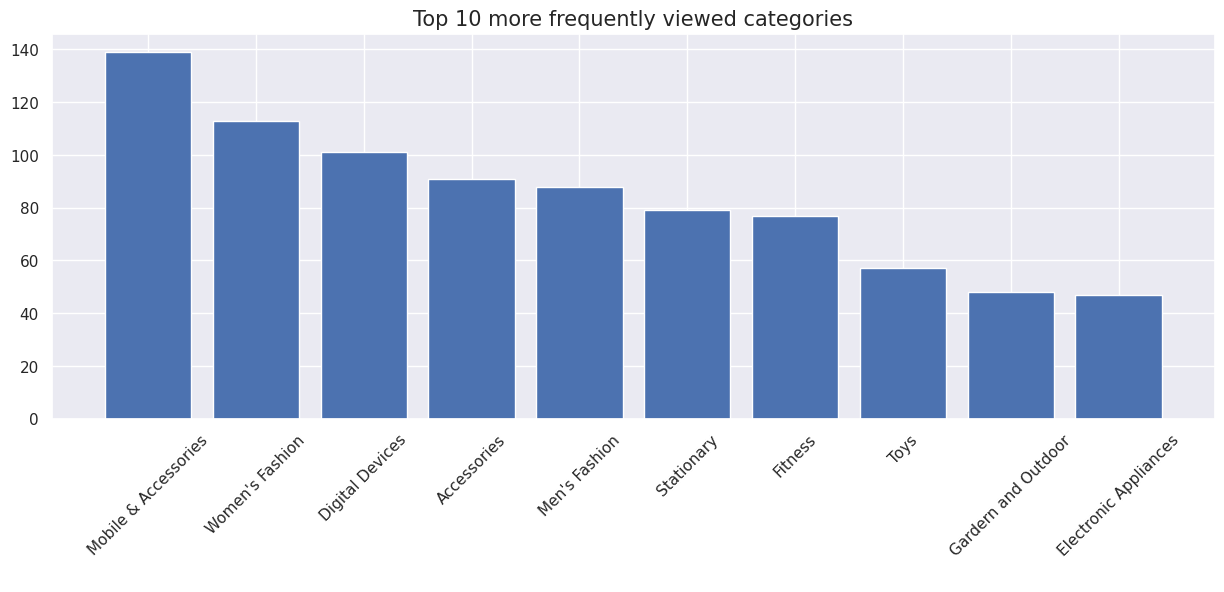

In [ ]:
# Distribution of Category
print("Total Unique Categories: " + str(data.Category.nunique()))
temp_category = data.groupby('Category')['Session_id'].count().sort_values(ascending=False).reset_index()[:10]

plt.figure(figsize=(15,5))
plt.bar(temp_category.Category, temp_category.Session_id)
plt.title("Top 10 more frequently viewed categories", size=15)
plt.xticks(rotation=45)
plt.xlabel(" ")
plt.show()

***Key Insights :***

Tech-related items and fashion are the most popular categories among the viewers, while categories like toys and appliances are viewed less frequently in comparison.

#### Distribution of SubCategory:

([Contents:](#Contents:))

Total Unique SubCategories: 364


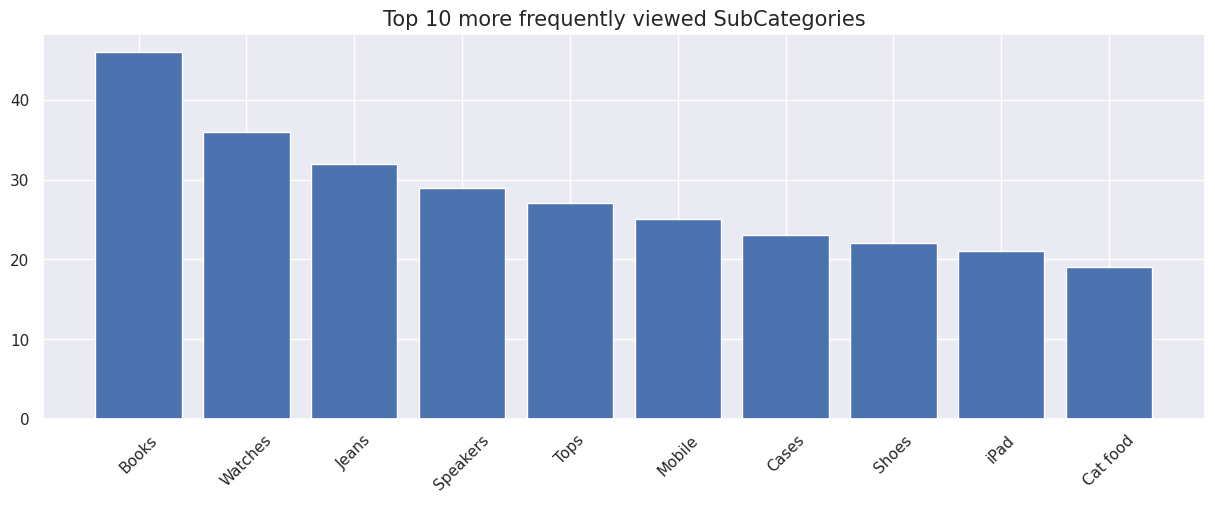

In [ ]:
# Distribution of SubCategory
print("Total Unique SubCategories: " + str(data.SubCategory.nunique()))
temp_subcategory = data.groupby('SubCategory')['Session_id'].count().sort_values(ascending=False).reset_index()[:10]

plt.figure(figsize=(15,5))
plt.bar(temp_subcategory.SubCategory, temp_subcategory.Session_id)
plt.title("Top 10 more frequently viewed SubCategories", size=15)
plt.xticks(rotation=45)
plt.xlabel(" ")
plt.show()

***Key Insights :***

While  categories like Mobile & Accessories and Women's Fashion are popular, specific subcategories like Books and Watches have their own strong appeal. The variety in subcategories, from fashion items like jeans and tops to tech accessories and even cat food, indicates diverse interests among viewers.

#### Distribution of Action:

([Contents:](#Contents:))

,count
Action,
read_reviews,342
search,320
product_view,292
add_to_cart,280
checkout,202
click_wishlist_page,202
purchase,201
first_app_open,121
add_review,69


Total Unique Actions: 11


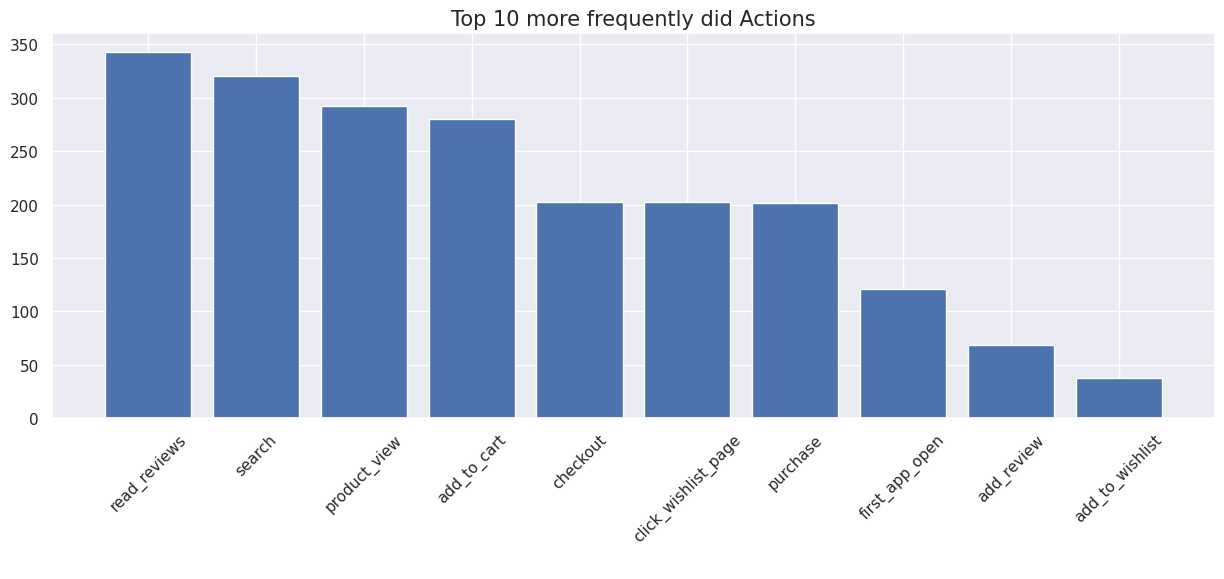

,count
Action,
read_reviews,343
search,320
product_view,292
add_to_cart,280
checkout,202
click_wishlist_page,202
purchase,201
first_app_open,121
add_review,69


In [ ]:
# Distribution of Action
display(data.Action.value_counts())

data['Action'] = data['Action'].apply(lambda x: 'read_reviews' if x in ('read_review') else x)
data['Action'] = data['Action'].apply(lambda x: 'add_to_wishlist' if x in ('add_to_wishist') else x)

print("Total Unique Actions: " + str(data.Action.nunique()))
temp_actions = data.groupby('Action')['Session_id'].count().sort_values(ascending=False).reset_index()[:10]

plt.figure(figsize=(15,5))
plt.bar(temp_actions.Action, temp_actions.Session_id)
plt.title("Top 10 more frequently did Actions", size=15)
plt.xticks(rotation=45)
plt.xlabel(" ")
plt.show()

data.Action.value_counts()

***Key Insights :***
1. Read Reviews is the most frequent action, with 343 occurrences, indicating
     that users place a high value on reading reviews before making decisions.
2. Search follows closely, with 320 occurrences, showing that users actively
     search for products or information.
3. Add to wishlist and Product Review  are the least frequent actions,
     indicating that writing detailed product reviews or adding products to wishlist were the least common actions.

This reveals that while users are active in searching, viewing, and considering products, fewer follow through with actions like adding to a wishlist or writing reviews.

In [ ]:
data.head(3)

,User_id,Session_id,DateTime,Category,SubCategory,Action,Quantity,Rate,Total Price
0,52243841613,d76fde-8bb3-4e00-8c23,2019-01-10 10:20:00,Electronic Appliances,Speakers,first_app_open,NaN,NaN,NaN
1,52243841613,33dfbd-b87a-4708-9857,2019-01-10 10:22:00,Electronic Appliances,Speakers,search,NaN,NaN,NaN
2,57314161118,6511c2-e2e3-422b-b695,2019-01-10 14:00:00,Men's Fashion,Jeans,search,NaN,NaN,NaN


#### Distribution of Quantity:

([Contents:](#Contents:))

Summary stats of Quantity:


,Quantity
count,201.000000
mean,2.965174
std,7.161968
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,100.000000


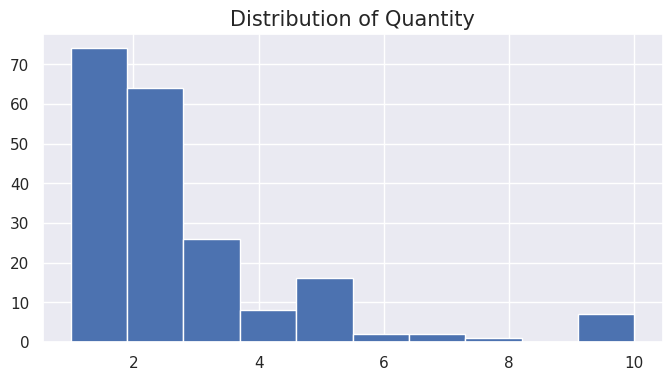

In [ ]:
# Distribution of Quantity
print("Summary stats of Quantity:")
display(data[['Quantity']].describe())

plt.figure(figsize=(8,4))
plt.hist(data[data['Quantity']<100]['Quantity'], density=False)
plt.title("Distribution of Quantity",size=15)
plt.show()

***Key Insights :***

It is evident from the summary stats that the "Quantity" column has an outlier (the value 100, occured only once in the dataset).

#### Distribution of Rate:

([Contents:](#Contents:))

Summary stats of Rate:


,Rate
count,201.000000
mean,7133.283582
std,14778.150668
min,10.000000
25%,500.000000
50%,1200.000000
75%,6000.000000
max,90000.000000


Total records less than or equal to 75% cut: 154

Total records greater than 75% cut: 47


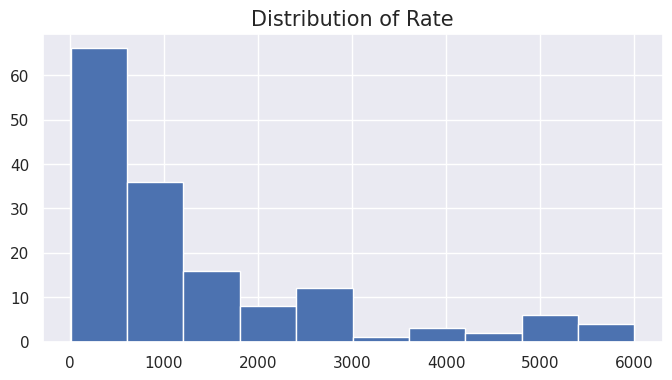

In [ ]:
# Distribution of Rate
print("Summary stats of Rate:")
display(data[['Rate']].describe())

print("Total records less than or equal to 75% cut: " + str(data[data['Rate']<=6000].shape[0]))
print("Total records greater than 75% cut: " + str(data[data['Rate']>6000].shape[0]))

plt.figure(figsize=(8,4))
plt.hist(data[data['Rate']<=6000]['Rate'], density=False, bins=10)
plt.title("Distribution of Rate",size=15)
plt.show()

***Key Insights :***

The distribution is positively  skewed, with a concentration of data points around the higher rate values.
The majority of observations fall within the 50th percentile, while the remaining rates are less common.

#### Distribution of Total Price:

([Contents:](#Contents:))

Summary stats of Total Price:


,Total Price
count,201.000000
mean,9455.373134
std,18213.695424
min,150.000000
25%,1000.000000
50%,2500.000000
75%,8000.000000
max,160000.000000


Total records less than or equal to 75% cut: 152

Total records greater than 75% cut: 49


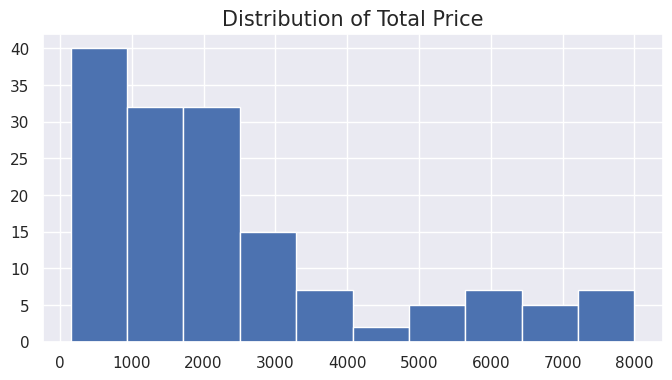

In [ ]:
# Distribution of Total Price
print("Summary stats of Total Price:")
display(data[['Total Price']].describe())
print("Total records less than or equal to 75% cut: " + str(data[data['Total Price']<=8000].shape[0]))
print("Total records greater than 75% cut: " + str(data[data['Total Price']>8000].shape[0]))
plt.figure(figsize=(8,4))
plt.hist(data[data['Total Price']<=8000]['Total Price'], density=False)
plt.title("Distribution of Total Price",size=15)
plt.show()

***Key Insights :***
1. As the total price increases, the frequency generally decreases.
2. The distribution shows that most data points cluster around lower total   
   prices.
3. The decreasing frequency as prices rise suggests that higher prices are less
   common.
4. The graph is positively skewed.





## Multivariate Analysis:

([Contents:](#Contents:))

Multivariate analysis helps us to understand how two or more columns are related to each other and its relationship with the target variable.

Based on the initial understanding of the different columns in the data (univariate analysis), we can create some hypothesis (if any) or try to ask more complex questions such as:
* How many unique users in the data and how many of them purchased atleast once? Also, what is the average number of purchase per customer?
* Which is the most purchased Category/Sub-category?
* Do people add the products to cart before they purchase or buy directly?
* What is the average time taken by a user to buy a product?
* What is the average time between repeat purchase?
* What is the trend of unique users across the time period?
* What is the trend of purchase across the time period?

This is not the exhaustive list but good to start with.

#### How many unique users in the data and how many of them purchased atleast once? Also, what is the average number of purchase per customer?

([Contents:](#Contents:))

In [ ]:
# unique customers
total_users = data.User_id.nunique()
print(f"Total customers: {total_users}")

# atleast 1 purchase customer
atleast_one_purchase_cust = data[data['Action']=='purchase']['User_id'].nunique()
conversion = 100*round(atleast_one_purchase_cust/total_users,2)
print(f"Customers who made atleast 1 purchase: {atleast_one_purchase_cust} ({conversion}% conversion)")

# avg purchase per customer
purch_dist_by_cust = (data[data['Action']=='purchase'].groupby('User_id').agg({'SubCategory': 'count'})
                      .reset_index().sort_values(by='SubCategory',ascending=False)
                     )
purch_dist_by_cust.rename(columns={'SubCategory':'no_of_purchase'},inplace=True)

print(f"Average number of purchase per customer: {round(purch_dist_by_cust.no_of_purchase.mean(),2)}")
print("\nDistribution of Number of Purchases:")
display(purch_dist_by_cust[['no_of_purchase']].describe())


Total customers: 401

Customers who made atleast 1 purchase: 167 (42.0% conversion)

Average number of purchase per customer: 1.2



Distribution of Number of Purchases:


,no_of_purchase
count,167.000000
mean,1.203593
std,0.432685
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,3.000000


***Key Insights :***

*   Out of the total 401 unique customers, 167 customers made at least one purchase.
*   The conversion rate (percentage of customers who made a purchase) is 42.0%.
*   On average, each customer made 1.2 purchases.
*   Maximium no of purachses made by a customer is 3.





#### Which is the most purchased Category/Sub-category?

([Contents:](#Contents:))

Total Unique Categories: 105


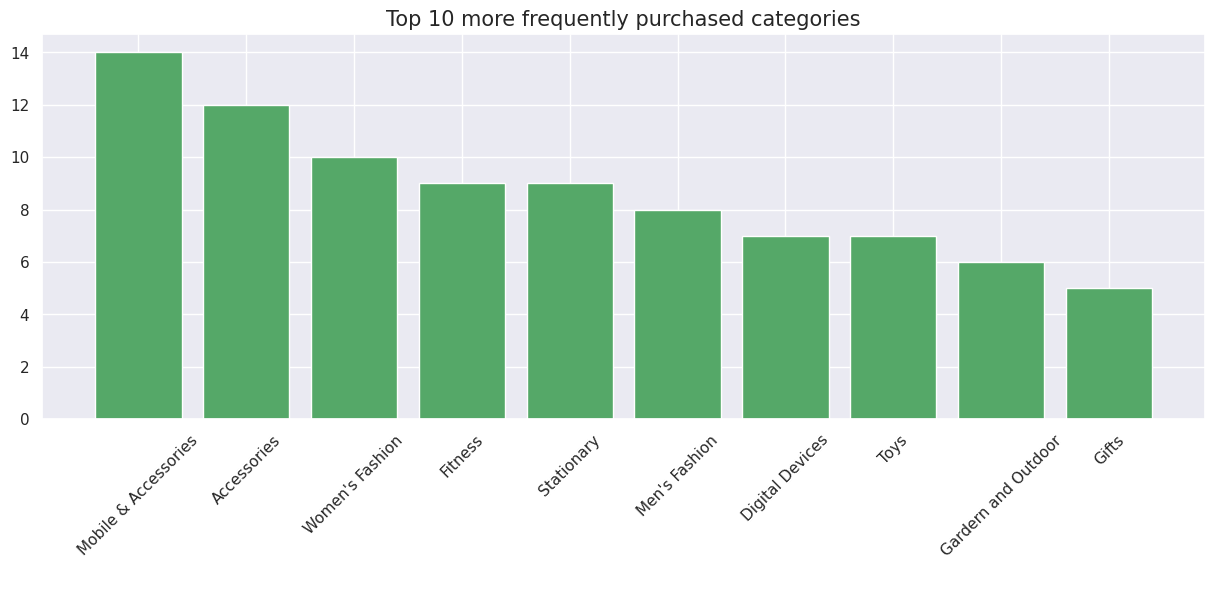

Total Unique SubCategory: 364


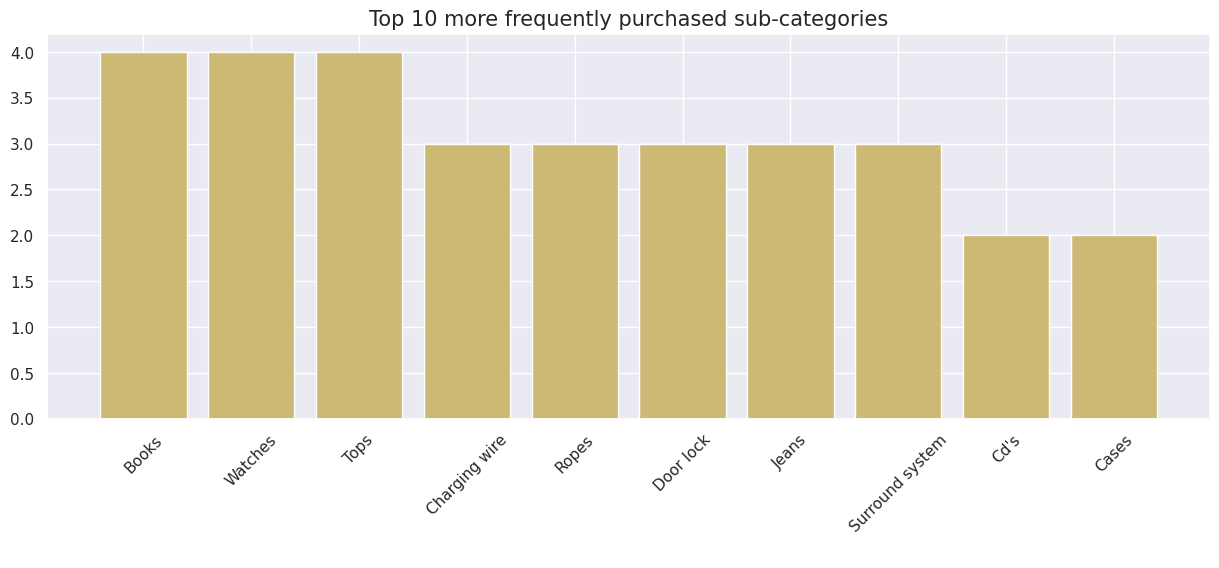

In [ ]:
# Top 10 purchased Category
print("Total Unique Categories: " + str(data.Category.nunique()))
temp_category = data[data['Action']=='purchase'].groupby('Category')['User_id'].count().sort_values(ascending=False).reset_index()[:10]

plt.figure(figsize=(15,5))
plt.bar(temp_category.Category, temp_category.User_id, color='g')
plt.title("Top 10 more frequently purchased categories", size=15)
plt.xticks(rotation=45)
plt.xlabel(" ")
plt.show()

# Top 10 purchased SubCategory
print("Total Unique SubCategory: " + str(data.SubCategory.nunique()))
temp_subcategory = data[data['Action']=='purchase'].groupby('SubCategory')['User_id'].count().sort_values(ascending=False).reset_index()[:10]

plt.figure(figsize=(15,5))
plt.bar(temp_subcategory.SubCategory, temp_subcategory.User_id, color='y')
plt.title("Top 10 more frequently purchased sub-categories", size=15)
plt.xticks(rotation=45)
plt.xlabel(" ")
plt.show()

***Key Insights :***

*   Music & Accessories is the most frequently purchased  category.
*   Books,Watches and Tops are the most frequently purchased sub-categories.



#### Do people add the products to cart before they purchase or buy directly?

([Contents:](#Contents:))

In [ ]:
# Distribution of users who purchased after adding to cart and direct purchase
purchase_users = data[data['Action']=='purchase'].groupby('User_id')['Action'].count().reset_index()

cart_users = data[data['Action']=='add_to_cart'].groupby('User_id')['Action'].count().reset_index()

temp = pd.merge(purchase_users,cart_users,on='User_id',how='left',indicator=True)
direct_buy = temp[temp['_merge']=='left_only'].shape[0]

temp = pd.merge(cart_users,purchase_users,on='User_id',how='left',indicator=True)
cart_only = temp[temp['_merge']=='left_only'].shape[0]

print("Total unique users who purchased: " + str(purchase_users.shape[0]))
print("Total direct buy (without adding to cart): " + str(direct_buy))
print("Total add_to_cart buy: " + str(cart_users.shape[0]-cart_only))

print("\nTotal unique users who added to cart: " + str(cart_users.shape[0]))
print("Total cart only users (no purchase): " + str(cart_only))

Total unique users who purchased: 167

Total direct buy (without adding to cart): 20

Total add_to_cart buy: 147



Total unique users who added to cart: 240

Total cart only users (no purchase): 93


***Key Insights :***

*   There were 20 instances where users made a direct purchase without adding
     the product to their cart.
*   A total of 240 unique users added items to their cart.
*   There were 93 users who added items to their cart but did not complete a
  purchase.
*   In 147 cases, users added products to their cart before making a purchase.

Most users prefer adding items to their cart before making a purchase.
However, a significant number of users (93) abandoned their carts without completing the purchase.



#### What is the average time taken by a user to buy a product?

([Contents:](#Contents:))

In [ ]:
print(purch_dist_by_cust.shape)
purch_dist_by_cust.head()

(167, 2)


,User_id,no_of_purchase
165,60238282834,3
17,51565158157,3
0,51448162784,2
108,53966220604,2
34,51725305614,2




Summary stats (Time diff in days):


,avg_time_diff_days
count,2090.000000
mean,58.562679
std,94.365687
min,0.000000
25%,0.000000
50%,0.000000
75%,105.000000
max,335.000000


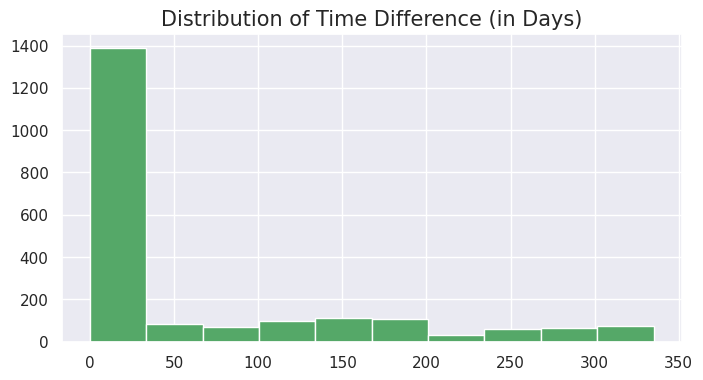



Summary stats (Time diff in minutes):


,avg_time_diff_minutes
count,2090.000000
mean,231.705742
std,394.751734
min,0.000000
25%,14.000000
50%,30.000000
75%,242.000000
max,1404.000000


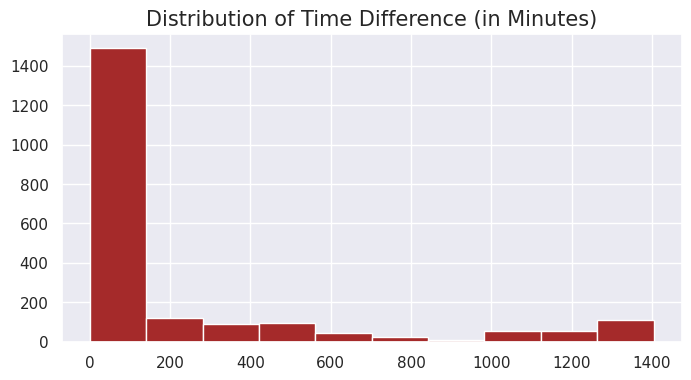

In [ ]:
# Avg time difference between purchase
# Also after purchase users are either adding review or not. But since add_review event is low (69), ignoring it now
temp = data.copy()
temp = pd.merge(temp, purch_dist_by_cust, on='User_id', how='left')
temp['no_of_purchase'] = temp['no_of_purchase'].fillna(0)
# temp = temp[temp['no_of_purchase'] == 1].reset_index(drop=True)
# print("Total users who made exactly 1 purchase: " +str(temp.User_id.nunique()))

temp['min_time'] = temp.groupby('User_id')['DateTime'].transform(min)
temp['max_purchase_time'] = temp.groupby('User_id')['DateTime'].transform(max)
temp['avg_time_diff_days'] = (temp['max_purchase_time']-temp['min_time']).dt.days
temp['avg_time_diff_minutes'] = (temp['max_purchase_time']-temp['min_time']).dt.seconds/60

print("\nSummary stats (Time diff in days):")
display(temp[['avg_time_diff_days']].describe())

plt.figure(figsize=(8,4))
plt.hist(temp['avg_time_diff_days'], density=False, color='g')
plt.title("Distribution of Time Difference (in Days)",size=15)
plt.show()

print("\nSummary stats (Time diff in minutes):")
display(temp[['avg_time_diff_minutes']].describe())

plt.figure(figsize=(8,4))
plt.hist(temp['avg_time_diff_minutes'], density=False, color='brown')
plt.title("Distribution of Time Difference (in Minutes)",size=15)
plt.show()

***Key Insights :***


*   The graph shows a large concentration of occurrences within the first 50    
     days.
*   there is a sharp drop-off in frequency after first 50 days

The highest frequency occurs within the first time interval category suggests that a significant event or occurrence happened during this initial period.
As time increases beyond the initial interval, the frequency of occurrences decreases significantly,this could imply that user engagement or interest declines over time or Users might  find alternatives after the initial excitement.

#### What is the average time between repeat purchase?

([Contents:](#Contents:))

Total users who made more than 1 purchase: 32



Summary stats (Time diff in days):


,diff
count,32.00000
mean,101.03125
std,76.81628
min,0.00000
25%,35.25000
50%,90.50000
75%,177.25000
max,245.00000


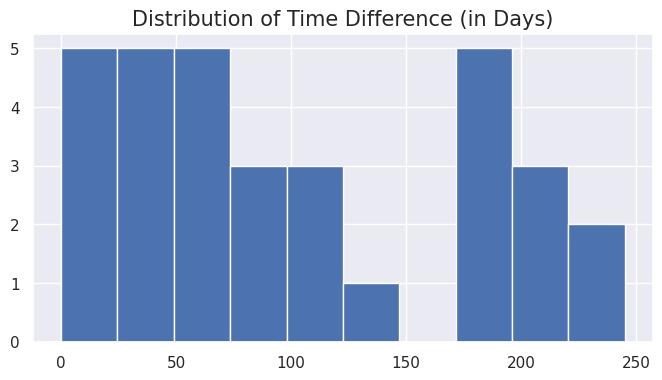

In [ ]:
# Average time between repeat purchase
temp = data.copy()
temp = pd.merge(temp, purch_dist_by_cust, on='User_id', how='left')
temp['no_of_purchase'] = temp['no_of_purchase'].fillna(0)
temp = temp[temp['no_of_purchase'] > 1].reset_index(drop=True)
print("Total users who made more than 1 purchase: " +str(temp.User_id.nunique()))

def purch_time_diff(x):
    if len(x) == 2:
        return (x[1]-x[0]).days

    if len(x) == 3:
        diff_12 = (x[1]-x[0]).days
        diff_23 = (x[2]-x[1]).days
        return (diff_12+diff_23)/2

test = temp[temp['Action']=='purchase'].sort_values(by=['User_id','DateTime'])
test = test.groupby('User_id').agg({'DateTime': lambda x: list(x)})
test['diff'] = test['DateTime'].apply(purch_time_diff)
test = test.reset_index()

print("\nSummary stats (Time diff in days):")
display(test[['diff']].describe())

plt.figure(figsize=(8,4))
plt.hist(test['diff'], density=False, color='b')
plt.title("Distribution of Time Difference (in Days)",size=15)
plt.show()

***Key Insights :***



*   The mean time difference is approximately 101.03 days which represents the  
     average duration between subsequent purchases made by users.
*   The minimum time difference is 0 days, which means some users made repeat
     purchases immediately.
*   The standard deviation  is 76.82 days.A higher standard deviation suggests
     greater variability in user behavior.
**bold text**




In [ ]:
test.sample(5)

,User_id,DateTime,diff
17,51969791374,"[2019-08-19 18:36:00, 2019-10-26 14:40:00]",67.0
13,51676463689,"[2019-05-27 11:45:00, 2019-10-10 17:47:00]",136.0
14,51725305614,"[2019-08-01 22:03:00, 2019-11-28 21:26:00]",118.0
11,51596197877,"[2019-04-11 13:52:00, 2019-10-24 11:40:00]",195.0
22,54447852002,"[2019-06-28 18:40:00, 2019-10-11 22:33:00]",105.0


#### What is the trend of unique users across time period?

([Contents:](#Contents:))

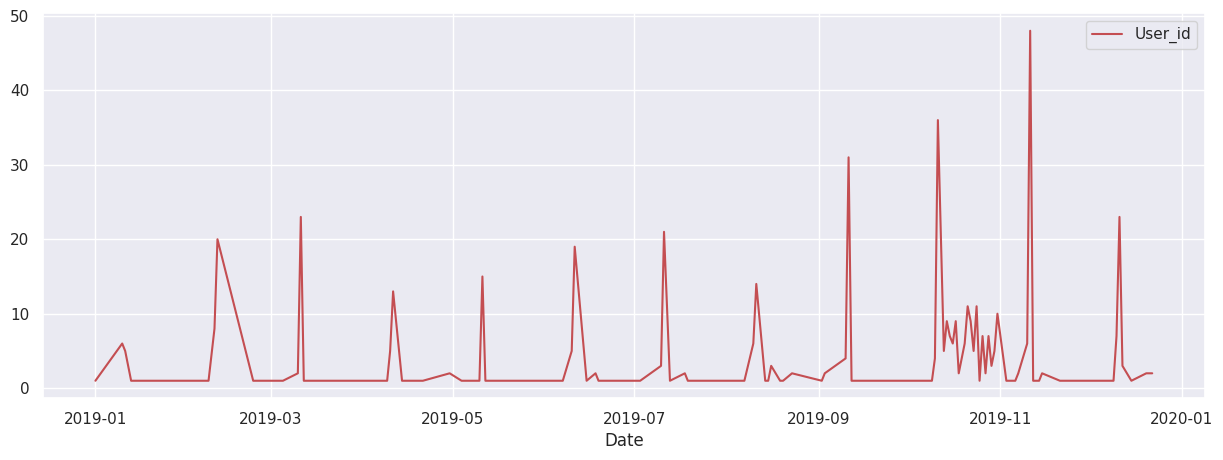

In [ ]:
# Distribution of unique users across dates
temp = data.copy()
temp['Date'] = temp['DateTime'].dt.date
temp = temp.groupby('Date').agg({'User_id': 'nunique'}).reset_index().sort_values(by='Date')
# display(temp.head())

temp.set_index('Date').plot(figsize=(15,5), color='r')
plt.show()

***Key Insights :***

 There is a significant spike around November 2019, where the number of
   unique users reaches its highest point, close to 50.This suggests an event or change such as black friday that caused a substantial increase in user activity during that period.




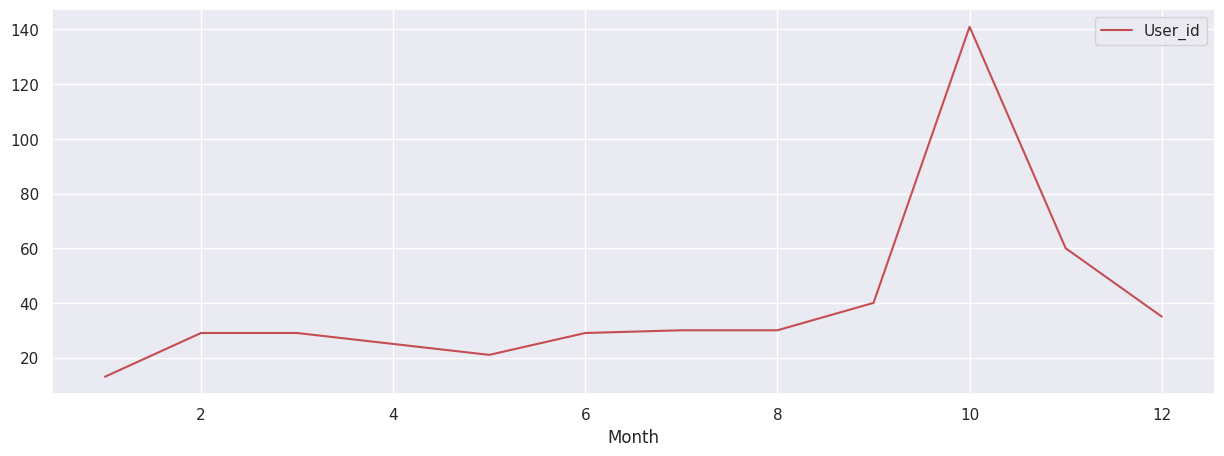

In [ ]:
# Distribution of unique users across Month
temp = data.copy()
temp['Date'] = temp['DateTime'].dt.date
temp['Month'] = temp['DateTime'].dt.month
temp = temp.groupby('Month').agg({'User_id': 'nunique'}).reset_index().sort_values(by='Month')
# display(temp.head())

temp.set_index('Month').plot(figsize=(15,5),color='r')
plt.show()

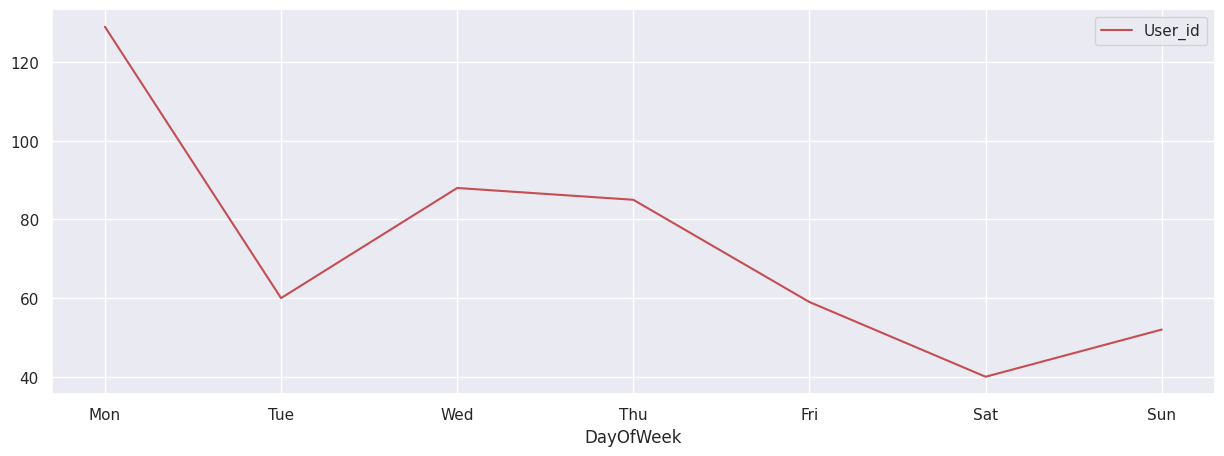

In [ ]:
# Distribution of unique users across weekdays
temp = data.copy()
temp['Date'] = temp['DateTime'].dt.date
temp['Month'] = temp['DateTime'].dt.month
temp['DayOfWeek'] = temp['DateTime'].dt.dayofweek
temp = temp.groupby('DayOfWeek').agg({'User_id': 'nunique'}).reset_index().sort_values(by='DayOfWeek')
# display(temp.head())

temp.set_index('DayOfWeek').plot(figsize=(15,5),color='r')
plt.xticks([0,1,2,3,4,5,6],['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.show()

***Key Insights :***

User engagement starts strong on Monday, drops significantly on Friday, reaches
its lowest point on Saturday, and then increases sharply on Sunday.The significant drop in user IDs on Friday and Saturday suggests reduced activity during the weekend. This could be due to various factors, such as users being less active or fewer new sign-ups during those days.

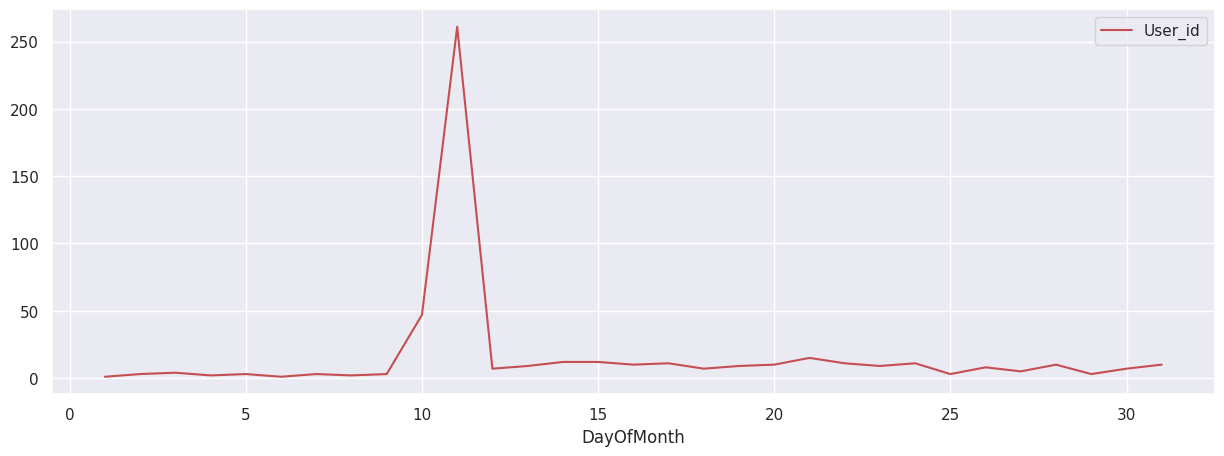

In [ ]:
# Distribution of unique users across day of month
temp = data.copy()
temp['Date'] = temp['DateTime'].dt.date
temp['Month'] = temp['DateTime'].dt.month
temp['DayOfWeek'] = temp['DateTime'].dt.dayofweek
temp['DayOfMonth'] = temp['DateTime'].dt.day
temp = temp.groupby('DayOfMonth').agg({'User_id': 'nunique'}).reset_index().sort_values(by='DayOfMonth')
# display(temp.head())

temp.set_index('DayOfMonth').plot(figsize=(15,5),color='r')
plt.show()

***Key Insights :***

The significant spike in user IDs around the 10th day of the month suggests an event or occurrence that caused a sudden increase in user sign-ups or engagement.

#### What is the trend of purchase across the time period?





([Contents:](#Contents:))

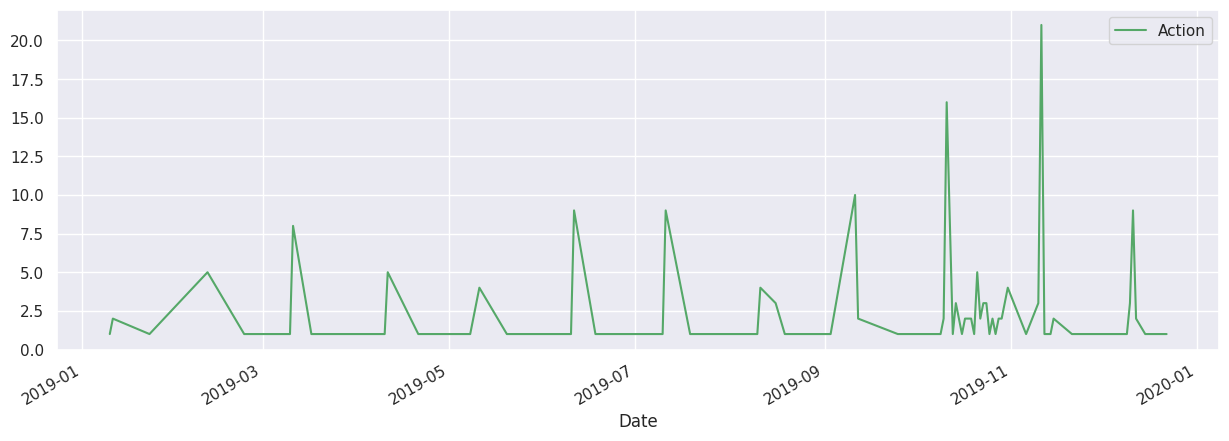

In [ ]:
# Distribution of purchases across dates
temp = data.copy()
temp['Date'] = temp['DateTime'].dt.date
temp['Date'] = pd.to_datetime(temp['Date'])
temp['Month'] = temp['DateTime'].dt.month
temp['DayOfWeek'] = temp['DateTime'].dt.dayofweek
temp = temp[temp['Action']=='purchase'].groupby('Date').agg({'Action': 'count'}).reset_index().sort_values(by='Date')
# display(temp.head())
# print(temp.Action.sum())

temp.set_index('Date').plot(figsize=(15,5), color='g')
plt.show()

***Key Insights :***

Notable spikes occur around mid-2019 and late 2019,particularly  sharp between october 2019 and november 2019
This sharp spike purchases indicates either its a Seasonal Trends or Promotions and Discounts or a new Product Launch.

## Conclusion



1. **Category and Subcategory Popularity**: Tech-related items and fashion categories are the most frequently viewed, with specific subcategories like Mobile Accessories and Women's Fashion leading the way. However, there’s also a noticeable interest in niche areas such as Books and Watches, indicating diverse customer interests.
2. **User Actions**: "Read Reviews" emerged as the most common action, emphasizing its role in the purchase decision-making process. Conversely, actions like adding products to wishlists or writing reviews were less frequent, suggesting potential areas for encouraging more user engagement.

3.  **Distribution of Key Metrics**: Positive skewness and outliers are present in quantity, rate, and total price data.
4. **Seasonal Trends**: Sharp spikes in purchase activity point to promotions and seasonal trends, with a notable increase in user engagement during those periods.


